**Author:** Tristan Bouvier 
**Context:** Personal portfolio project – Data Analyst internship


# IMDb Data Analysis – Films & Series

This notebook explores IMDb ratings and rankings to identify trends over time.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 1. Data Loading


In [3]:
# Load raw IMDb dataset
df = pd.read_csv("data/raw/imdb_raw.csv")

# Display first rows
df.head()


,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate


## 2. Data Overview


In [4]:
# Dimensions of the dataset
df.shape


(6178, 14)

In [5]:
# Dataset structure and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         6178 non-null   object 
 1   Date         6178 non-null   int64  
 2   Rate         6178 non-null   object 
 3   Votes        6178 non-null   object 
 4   Genre        6178 non-null   object 
 5   Duration     5877 non-null   float64
 6   Type         6178 non-null   object 
 7   Certificate  5728 non-null   object 
 8   Episodes     6178 non-null   object 
 9   Nudity       4719 non-null   object 
 10  Violence     5504 non-null   object 
 11  Profanity    5520 non-null   object 
 12  Alcohol      5407 non-null   object 
 13  Frightening  5320 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 675.8+ KB


## 3. Data Cleaning


In [6]:
# Convert Rate to numeric
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")

df["Rate"].dtype


dtype('float64')

In [7]:
# Remove commas and convert Votes to numeric
df["Votes"] = df["Votes"].str.replace(",", "")
df["Votes"] = pd.to_numeric(df["Votes"], errors="coerce")

df["Votes"].dtype


dtype('float64')

In [8]:
df[["Rate", "Votes", "Duration"]].isna().sum()


Rate        185
Votes       185
Duration    301
dtype: int64

## 4. IMDb Ratings Over Time


In [9]:
# Keep rows with valid ratings and dates
df_ratings = df.dropna(subset=["Rate", "Date"])

df_ratings.shape


(5993, 14)

In [10]:
avg_rating_per_year = (
    df_ratings
    .groupby("Date")["Rate"]
    .mean()
    .reset_index()
)
avg_rating_per_year.head()


,Date,Rate
0,1922,7.900000
1,1927,8.300000
2,1931,7.725000
3,1932,7.366667
4,1933,7.666667


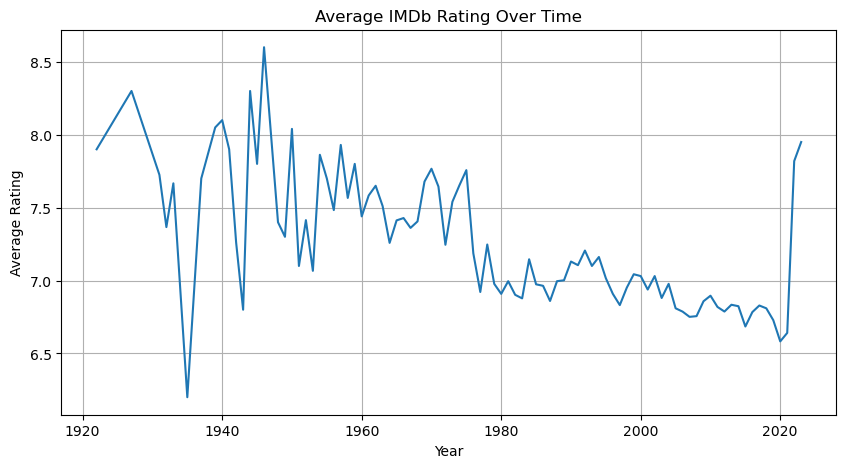

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(avg_rating_per_year["Date"], avg_rating_per_year["Rate"])
plt.title("Average IMDb Rating Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()


## 5. Weighted Ratings Analysis


In [12]:
df_votes = df.dropna(subset=["Rate", "Votes", "Date"])
df_votes.shape


(5993, 14)

In [18]:
df_votes = df.dropna(subset=["Rate", "Votes", "Date"]).copy()

weighted_rating_per_year = (
    df_votes.assign(rate_x_votes=df_votes["Rate"] * df_votes["Votes"])
    .groupby("Date", as_index=False)
    .agg(
        votes_sum=("Votes", "sum"),
        rate_x_votes_sum=("rate_x_votes", "sum")
    )
)

weighted_rating_per_year["Weighted_Rate"] = (
    weighted_rating_per_year["rate_x_votes_sum"] / weighted_rating_per_year["votes_sum"]
)

weighted_rating_per_year.head()


,Date,votes_sum,rate_x_votes_sum,Weighted_Rate
0,1922,92629.0,731769.1,7.900000
1,1927,167247.0,1388150.1,8.300000
2,1931,282765.0,2259526.3,7.990827
3,1932,94733.0,708043.5,7.474096
4,1933,257562.0,2008389.4,7.797693


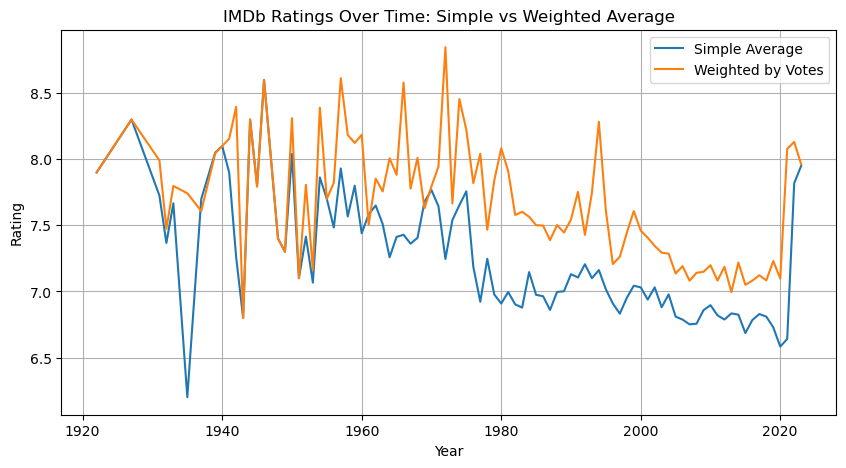

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(avg_rating_per_year["Date"], avg_rating_per_year["Rate"], label="Simple Average")
plt.plot(weighted_rating_per_year["Date"], weighted_rating_per_year["Weighted_Rate"], label="Weighted by Votes")
plt.title("IMDb Ratings Over Time: Simple vs Weighted Average")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.legend()
plt.grid(True)
plt.show()


## 6. Films vs Series Comparison


In [20]:
df["Type"].value_counts()


Type
Film      4446
Series    1732
Name: count, dtype: int64

In [21]:
df_type = df.dropna(subset=["Rate", "Votes", "Date", "Type"])
df_type = df_type[df_type["Type"].isin(["Film", "Series"])]

df_type.shape


(5993, 14)

In [22]:
type_weighted = (
    df_type.assign(rate_x_votes=df_type["Rate"] * df_type["Votes"])
    .groupby(["Date", "Type"], as_index=False)
    .agg(
        votes_sum=("Votes", "sum"),
        rate_x_votes_sum=("rate_x_votes", "sum")
    )
)

type_weighted["Weighted_Rate"] = (
    type_weighted["rate_x_votes_sum"] / type_weighted["votes_sum"]
)

type_weighted.head()


,Date,Type,votes_sum,rate_x_votes_sum,Weighted_Rate
0,1922,Film,92629.0,731769.1,7.900000
1,1927,Film,167247.0,1388150.1,8.300000
2,1931,Film,269335.0,2161487.3,8.025274
3,1931,Series,13430.0,98039.0,7.300000
4,1932,Film,94733.0,708043.5,7.474096


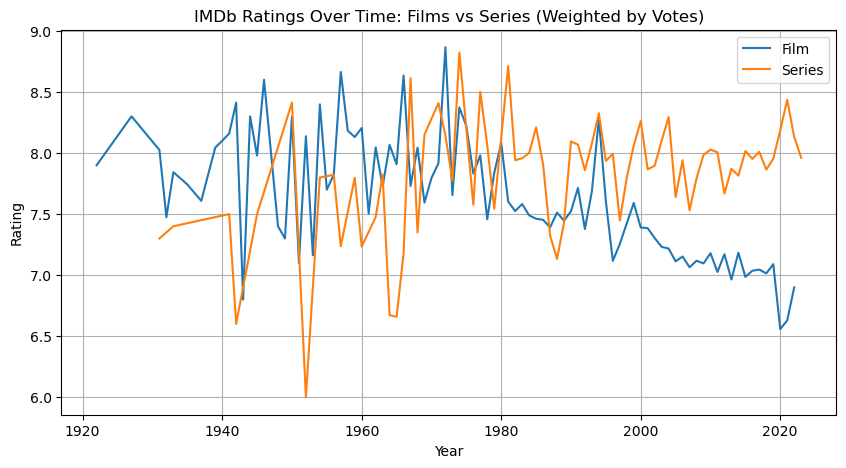

In [23]:
plt.figure(figsize=(10, 5))

for t in ["Film", "Series"]:
    subset = type_weighted[type_weighted["Type"] == t]
    plt.plot(subset["Date"], subset["Weighted_Rate"], label=t)

plt.title("IMDb Ratings Over Time: Films vs Series (Weighted by Votes)")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.legend()
plt.grid(True)
plt.show()


## Key Insights

- Average IMDb ratings show a declining trend over time, largely driven by content volume.
- Weighted ratings provide a more robust measure of perceived quality than simple averages.
- TV series tend to receive higher ratings than films, especially since the rise of streaming platforms.
